# **Signal Modeling: Autoregressive and Moving Average Models - Krzysztof Wąsik** 

This report explores the modeling of a heteroscedastic signal—one where variance fluctuates over time. We’ll fit AR(1) and ARIMA(1,0,1) models to evaluate their effectiveness in handling this behavior and discuss their limitations. The goal is to understand how changes in variance impact model performance and highlight the importance of choosing the right approach for such data.

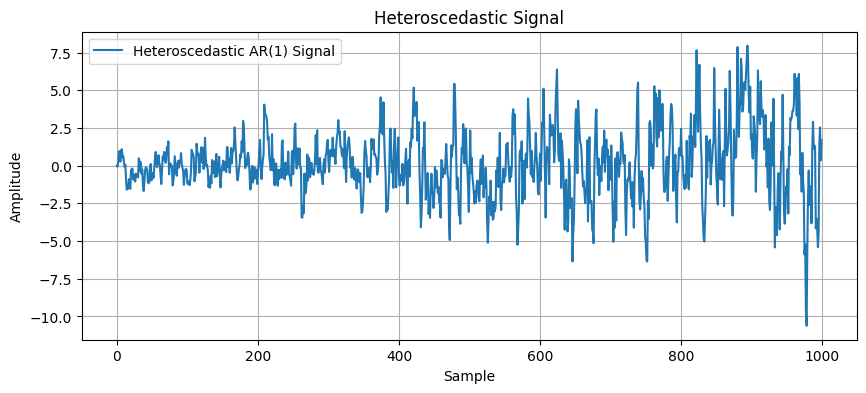

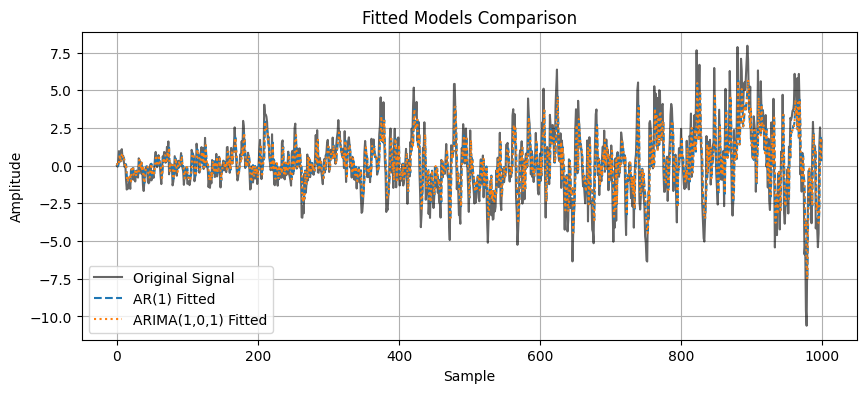

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

np.random.seed(42)

N = 1000

phi = 0.7
x = np.zeros(N)

time = np.arange(N)
sigma_t = 0.5 + 0.002 * time
noise = sigma_t * np.random.normal(0, 1, N)

for t in range(1, N):
    x[t] = phi * x[t-1] + noise[t]

plt.figure(figsize=(10, 4))
plt.plot(x, label='Heteroscedastic AR(1) Signal')
plt.title('Heteroscedastic Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


ar_model = ARIMA(x, order=(1, 0, 0))
ar_fit = ar_model.fit()
arima_model = ARIMA(x, order=(1, 0, 1))
arima_fit = arima_model.fit()

plt.figure(figsize=(10, 4))
plt.plot(x, label='Original Signal', color='black', alpha=0.6)
plt.plot(ar_fit.fittedvalues, label='AR(1) Fitted', linestyle='--')
plt.plot(arima_fit.fittedvalues, label='ARIMA(1,0,1) Fitted', linestyle=':')
plt.title('Fitted Models Comparison')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


# **Conclusions**
This exercise demonstrates the limitations of classical time series models when applied to data with heteroscedastic behavior and underscores the importance of adopting models that can accommodate changing variance. In our analysis, while both the AR(1) and ARIMA(1,0,1) models capture the core autoregressive dynamics, they fall short in modeling the non-constant noise level. The increasing variance over time is clearly visible in the residuals and model diagnostics, suggesting that the assumption of homoscedasticity is violated. This violation can lead to misleading inference, unreliable forecasts, and underestimation of risk in applications such as financial time series. Therefore, in scenarios where heteroscedasticity is present, models like ARCH or GARCH become essential to better capture the volatility dynamics and provide more robust predictions.